Enter a date (DD-MM-YYYY) to get the predicted closing value: 23-10-2024
Predicted closing value on 23-10-2024 is: 926.37


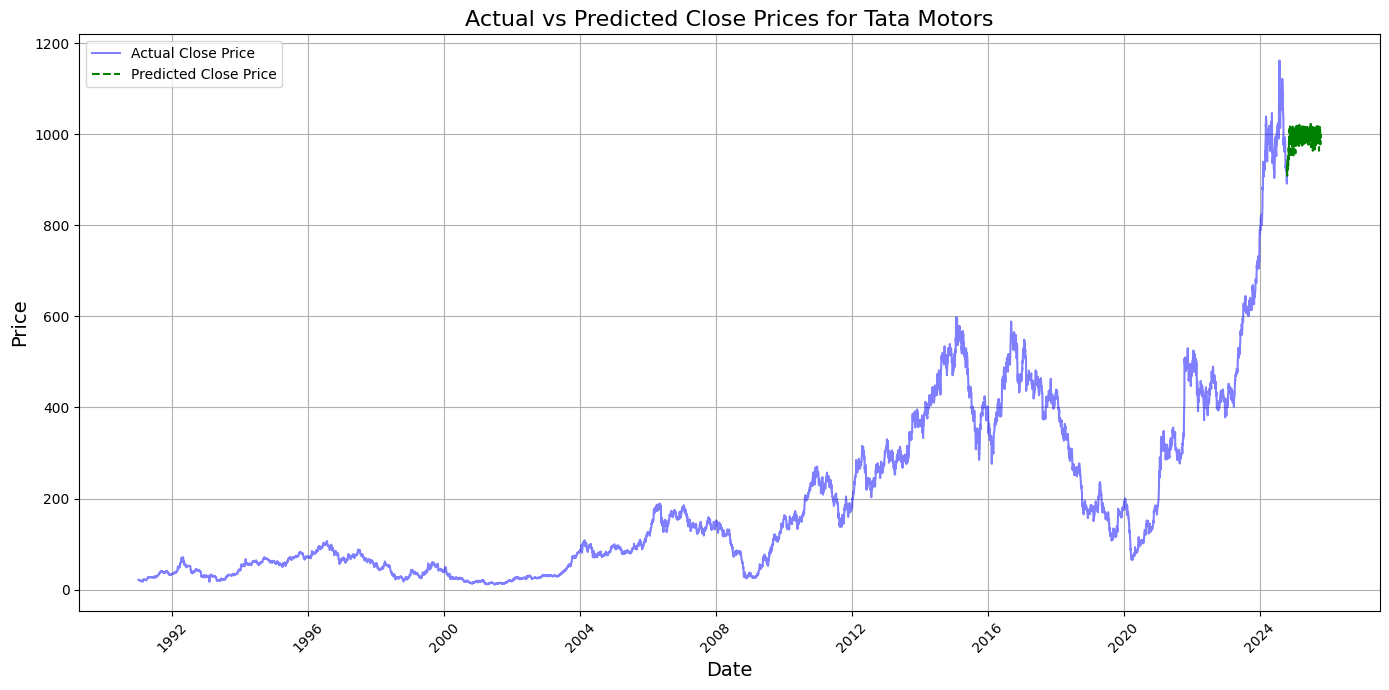

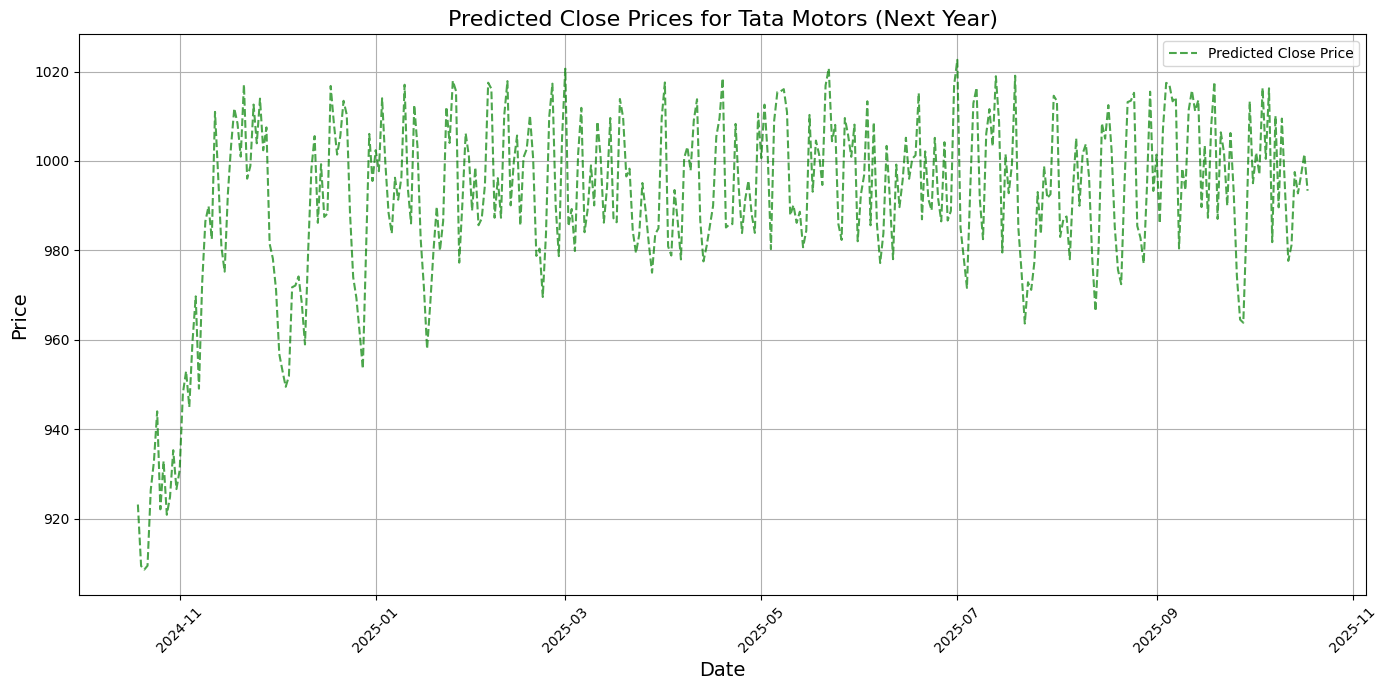

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import random

# Setting random seeds for reproducibility
random.seed(42)
np.random.seed(42)

# Loading the dataset
data = pd.read_csv('TATAMOTORS.NS[1].csv')

# Ensure the 'Date' column is parsed correctly
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Automatically handle parsing errors
if data['Date'].isnull().any():
    raise ValueError("Date parsing failed for some entries. Check the date format in your CSV.")

# Feature creation
data['Prev_Close'] = data['Close'].shift(1)
data['Prev_High'] = data['High'].shift(1)
data['Prev_Low'] = data['Low'].shift(1)
data['Prev_Volume'] = data['Volume'].shift(1)
data = data.dropna()  # Remove rows with NaN values

# Checking for empty DataFrame
if data.empty:
    raise ValueError("DataFrame is empty after processing. Please check your data.")

# Initializing features and target variable
X = data[['Prev_Close', 'Prev_High', 'Prev_Low', 'Prev_Volume']]
Y = data['Close']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

last_row = data[['Prev_Close', 'Prev_High', 'Prev_Low', 'Prev_Volume']].iloc[-1].values.reshape(1, -1)

# Predicting future closing prices
future_days = 365  # You can modify the number of days here
future_predictions = []  # Empty list to store predicted values

for _ in range(future_days):  # Loop for future predictions
    last_row_df = pd.DataFrame(last_row, columns=['Prev_Close', 'Prev_High', 'Prev_Low', 'Prev_Volume'])  # Creating dataframe
    next_pred = model.predict(last_row_df)  # Predicting
    fluctuation = random.uniform(-0.02, 0.02)  # Introducing slight randomness for realism

    next_close = next_pred[0] * (1 + fluctuation)  # Predicting closing price with random fluctuation
    future_predictions.append(next_close)  # Accumulates all predicted closing prices
    last_row = np.array([[next_close, next_pred[0], next_pred[0], next_pred[0]]])  # Updating features

# Creating future dates for predictions
last_date = data['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# Creating DataFrame for future predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_predictions
})

# Function to get predicted close price
def get_predicted_close(specific_date):
    try:
        # Converting date from DD-MM-YYYY format to datetime
        date = pd.to_datetime(specific_date, dayfirst=True)
    except ValueError:
        return "Invalid date format. Please use DD-MM-YYYY."

    if date in future_df['Date'].values:  # Checking if the specified date exists
        predicted_value = future_df.loc[future_df['Date'] == date, 'Predicted_Close'].values[0]  # Retrieve predicted value
        return f"Predicted closing value on {specific_date} is: {predicted_value:.2f}"
    elif date in data['Date'].values:  # Checking if the date exists in historical data
        actual_value = data.loc[data['Date'] == date, 'Close'].values[0]  # Retrieve actual value
        return f"Closing value on {specific_date} was: {actual_value:.2f}"
    else:
        return f"The date {specific_date} is not within the next {future_days} days of predictions. Update the value in the future_days variable to predict for more years."

# User input for date in DD-MM-YYYY format
date_input = input("Enter a date (DD-MM-YYYY) to get the predicted closing value: ")
result = get_predicted_close(date_input)
if result:
    print(result)

# Visualization
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(data['Date'], data['Close'], color='blue', label='Actual Close Price', alpha=0.5)
plt.plot(future_df['Date'], future_df['Predicted_Close'], color='green', label='Predicted Close Price', linestyle='--')
plt.title('Actual vs Predicted Close Prices for Tata Motors', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the future predictions only
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(future_df['Date'], future_df['Predicted_Close'], color='green', label='Predicted Close Price', linestyle='--', alpha=0.7)
plt.title('Predicted Close Prices for Tata Motors (Next Year)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
